In [ ]:
import os
import platform
# Operating System
OS = platform.system()                                                               # returns 'Windows', 'Linux', etc

if not os.path.exists("./creditcard.zip"):
    os.system('gdown --id "1FUmrhhRkViHzvtJ0YL4vGSsV0Z67jQ9k" --output "./creditcard.zip"')
    if OS == "Linux":
        os.system('unzip -o -n "./creditcard.zip" -d "./"')

In [ ]:
# Install ydata-synthetic lib
os.system('pip install ydata-synthetic')
os.system('python -m pip uninstall matplotlib --yes')
os.system('yes | pip install matplotlib==3.1.3')
os.system('pip uninstall pandas --yes')
os.system('yes | pip install pandas==1.1.5')

0

In [ ]:
import sklearn.cluster as cluster

from ydata_synthetic.synthesizers.regular import VanilllaGAN, CGAN
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.preprocessing.regular.credit_fraud import *

model = VanilllaGAN           #model = Vanilla GAN, CGAN, DCGAN, etc.
#model = CGAN           #model = Vanilla GAN, CGAN, DCGAN, etc.
str_model = str(model).split('.')[-1][:-2]

In [ ]:
print(str_model)

VanilllaGAN


In [ ]:
# Read the original data and have it preprocessed
data = pd.read_csv('./creditcard.csv', index_col=[0])

In [ ]:
data.shape
#data.head
data.describe

<bound method NDFrame.describe of                  V1         V2        V3  ...       V28  Amount  Class
Time                                      ...                         
0.0       -1.359807  -0.072781  2.536347  ... -0.021053  149.62      0
0.0        1.191857   0.266151  0.166480  ...  0.014724    2.69      0
1.0       -1.358354  -1.340163  1.773209  ... -0.059752  378.66      0
1.0       -0.966272  -0.185226  1.792993  ...  0.061458  123.50      0
2.0       -1.158233   0.877737  1.548718  ...  0.215153   69.99      0
...             ...        ...       ...  ...       ...     ...    ...
172786.0 -11.881118  10.071785 -9.834783  ...  0.823731    0.77      0
172787.0  -0.732789  -0.055080  2.035030  ... -0.053527   24.79      0
172788.0   1.919565  -0.301254 -3.249640  ... -0.026561   67.88      0
172788.0  -0.240440   0.530483  0.702510  ...  0.104533   10.00      0
172792.0  -0.533413  -0.189733  0.703337  ...  0.013649  217.00      0

[284807 rows x 30 columns]>

In [ ]:
# Extract list of columns
data_cols = list(data.columns[ data.columns != 'Class' ])

print('Dataset columns: {}'.format(data_cols))
sorted_cols = ['V14', 'V4', 'V10', 'V17', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23', 'Class']
processed_data = data[ sorted_cols ].copy()
processed_data.shape
processed_data.describe

Dataset columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


<bound method NDFrame.describe of                V14        V4       V10  ...        V9       V23  Class
Time                                    ...                           
0.0      -0.311169  1.378155  0.090794  ...  0.363787 -0.110474      0
0.0      -0.143772  0.448154 -0.166974  ... -0.255425  0.101288      0
1.0      -0.165946  0.379780  0.207643  ... -1.514654  0.909412      0
1.0      -0.287924 -0.863291 -0.054952  ... -1.387024 -0.190321      0
2.0      -1.119670  0.403034  0.753074  ...  0.817739 -0.137458      0
...            ...       ...       ...  ...       ...       ...    ...
172786.0  4.626942 -2.066656  4.356170  ...  1.914428  1.014480      0
172787.0 -0.675143 -0.738589 -0.975926  ...  0.584800  0.012463      0
172788.0 -0.510602 -0.557828 -0.484782  ...  0.432454 -0.037501      0
172788.0  0.449624  0.689799 -0.399126  ...  0.392087 -0.163298      0
172792.0 -0.084316 -0.506271 -0.915427  ...  0.486180  0.376777      0

[284807 rows x 30 columns]>

# Before training the GAN do not forget to apply the required data transformations
# To ease here we've applied a PowerTransformation - make data distribution more Gaussian-like.

In [ ]:
_, data, _ = transformations(data)

In [ ]:
data.shape
data.describe

<bound method NDFrame.describe of                 V1        V2        V3  ...       V28    Amount  Class
Time                                    ...                           
0.0      -0.904815 -0.131503  2.176074  ... -0.053332  1.119013      0
0.0       0.626390  0.093067 -0.035062  ...  0.057491 -1.128464      0
1.0      -0.904242 -0.871858  1.381297  ... -0.173752  1.623286      0
1.0      -0.742857 -0.202760  1.401049  ...  0.201524  1.012504      0
2.0      -0.823641  0.530197  1.160592  ...  0.669838  0.692981      0
...            ...       ...       ...  ...       ...       ...    ...
172786.0 -3.432267  9.263793 -4.220558  ...  2.460015 -1.619788      0
172787.0 -0.639272 -0.120145  1.646499  ... -0.154346  0.096295      0
172788.0  1.309171 -0.274801 -1.858341  ... -0.070437  0.675590      0
172788.0 -0.395844  0.277522  0.391172  ...  0.333581 -0.427298      0
172792.0 -0.545340 -0.205586  0.391870  ...  0.054168  1.323200      0

[284807 rows x 30 columns]>

# For the purpose of this example we will only synthesize the minority class
# train_data contains 492 rows which had 'Class' value as 1 (which were very few)

In [ ]:
train_data = data.loc[ data['Class']==1 ].copy()
print("Dataset info: Number of records - {} Number of variables - {}".format(train_data.shape[0], train_data.shape[1]))

Dataset info: Number of records - 492 Number of variables - 30


# We define a K-means clustering method using sklearn, and declare that
# we want 2 clusters. We then apply this algorithm (fit_predict) to our train_data
# We essentially get an array of 492 rows ('labels') having values either 0 or 1 for the 2 clustered classes.

In [ ]:
algorithm = cluster.KMeans
args, kwds = (), {'n_clusters':2, 'random_state':0}
labels = algorithm(*args, **kwds).fit_predict(train_data[ data_cols ])

# Get the count of both classes
print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )

# Assign the k-means clustered classes' labels to the a seperate copy of train data 'fraud_w_classes'
fraud_w_classes = train_data.copy()
fraud_w_classes['Class'] = labels

   count
0    384
1    108


# GAN training

Below you can try to train your own generators using the available GANs architectures. You can train it either with labels (created using KMeans) or with no labels at all. 

Remember that for this exercise in particular we've decided to synthesize only the minority class from the Credit Fraud dataset.

In [ ]:
# Define the GAN and training parameters
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 400+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

train_sample = fraud_w_classes.copy().reset_index(drop=True)
print("train_sample.columns:")
print(train_sample.columns)

# There's only 1 class, so essentially rename the 'Class' to 'Class_1',
# which tells weather a sample data is of class 1 or not.
train_sample = pd.get_dummies(train_sample, columns=['Class'], prefix='Class', drop_first=True)

# 'Class_1' label
label_cols = [ i for i in train_sample.columns if 'Class' in i ]

# All columns except 'Class_1'
data_cols = [ i for i in train_sample.columns if i not in label_cols ]

# Scale down the data, and rename it to 'train_no_label'
train_sample[ data_cols ] = train_sample[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train_sample[ data_cols ]

train_sample.columns:
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [ ]:
train_sample.describe
#train_sample.values[0]

<bound method NDFrame.describe of            V1        V2        V3  ...       V28    Amount  Class_1
0   -0.124953  0.137084 -0.109710  ... -0.043551 -0.201301        0
1   -0.148248 -0.179549  0.072901  ...  0.012244  0.180017        0
2   -0.124656  0.121434 -0.039523  ... -0.046623  0.137785        0
3   -0.186538  0.089638 -0.156820  ...  0.253418  0.059574        0
4    0.066351  0.227461 -0.229417  ...  0.046252 -0.153696        0
..        ...       ...       ...  ...       ...       ...      ...
487 -0.111708  0.071688 -0.237871  ...  0.046609  0.163900        0
488  0.079248  0.084276 -0.256687  ...  0.058354 -0.162364        0
489 -0.061314  0.071742 -0.139247  ...  0.060694  0.075361        0
490 -0.150375  0.031707 -0.271619  ... -0.078523  0.138920        0
491  0.138212  0.002015 -0.156392  ... -0.003551  0.040815        0

[492 rows x 30 columns]>

In [ ]:
#Setting the GAN model parameters and the training step parameters
gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           n_cols=train_sample.shape[1],
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

In [ ]:
# Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(train_sample, train_args)

  0%|          | 1/401 [00:04<30:19,  4.55s/it]

0 [D loss: 0.657899, acc.: 50.00%] [G loss: 0.643715]
generated_data


  0%|          | 2/401 [00:04<13:22,  2.01s/it]

1 [D loss: 0.725485, acc.: 49.22%] [G loss: 0.596624]


  1%|          | 4/401 [00:05<05:15,  1.26it/s]

2 [D loss: 0.742819, acc.: 37.11%] [G loss: 0.745043]
3 [D loss: 0.647380, acc.: 69.53%] [G loss: 0.991632]


  1%|          | 5/401 [00:05<03:47,  1.74it/s]

4 [D loss: 0.636964, acc.: 83.98%] [G loss: 0.931757]


  1%|▏         | 6/401 [00:05<02:59,  2.20it/s]

5 [D loss: 0.578243, acc.: 96.88%] [G loss: 0.988973]


  2%|▏         | 8/401 [00:06<02:05,  3.12it/s]

6 [D loss: 0.662234, acc.: 55.47%] [G loss: 0.740949]
7 [D loss: 0.669008, acc.: 51.17%] [G loss: 0.746328]


  2%|▏         | 9/401 [00:06<01:54,  3.42it/s]

8 [D loss: 0.597691, acc.: 90.23%] [G loss: 0.903022]
9 [D loss: 0.623169, acc.: 61.72%] [G loss: 0.797136]

  2%|▏         | 10/401 [00:06<01:43,  3.76it/s]

  3%|▎         | 11/401 [00:06<01:40,  3.90it/s]

10 [D loss: 0.591633, acc.: 79.69%] [G loss: 0.846450]


  3%|▎         | 12/401 [00:07<01:50,  3.52it/s]

11 [D loss: 0.614180, acc.: 68.75%] [G loss: 0.797056]


  3%|▎         | 14/401 [00:07<01:35,  4.04it/s]

12 [D loss: 0.750311, acc.: 48.44%] [G loss: 0.616421]
13 [D loss: 0.680638, acc.: 44.53%] [G loss: 0.736181]


  4%|▎         | 15/401 [00:07<01:28,  4.38it/s]

14 [D loss: 0.425960, acc.: 86.33%] [G loss: 1.269021]


  4%|▍         | 16/401 [00:08<01:42,  3.77it/s]

15 [D loss: 0.338341, acc.: 90.23%] [G loss: 1.383256]


  4%|▍         | 17/401 [00:08<01:35,  4.00it/s]

16 [D loss: 0.453532, acc.: 75.78%] [G loss: 0.955068]


  4%|▍         | 18/401 [00:08<01:32,  4.14it/s]

17 [D loss: 0.528850, acc.: 58.20%] [G loss: 0.858900]


  5%|▍         | 20/401 [00:08<01:16,  4.98it/s]

18 [D loss: 0.659095, acc.: 44.14%] [G loss: 0.807252]
19 [D loss: 0.929122, acc.: 30.08%] [G loss: 0.545598]


  5%|▌         | 22/401 [00:09<01:00,  6.29it/s]

20 [D loss: 0.781297, acc.: 29.69%] [G loss: 0.805856]
21 [D loss: 0.752435, acc.: 32.42%] [G loss: 0.870978]


  6%|▌         | 24/401 [00:09<00:53,  7.08it/s]

22 [D loss: 0.691289, acc.: 53.91%] [G loss: 0.964950]
23 [D loss: 0.648269, acc.: 67.97%] [G loss: 1.007835]


  6%|▋         | 26/401 [00:09<00:48,  7.71it/s]

24 [D loss: 0.660899, acc.: 62.89%] [G loss: 0.968054]
25 [D loss: 0.665211, acc.: 58.98%] [G loss: 0.995222]


  7%|▋         | 28/401 [00:09<00:46,  7.99it/s]

26 [D loss: 0.602245, acc.: 71.88%] [G loss: 1.000902]
27 [D loss: 0.501510, acc.: 89.06%] [G loss: 1.057234]


  7%|▋         | 30/401 [00:10<00:46,  8.06it/s]

28 [D loss: 0.510319, acc.: 78.52%] [G loss: 0.893259]
29 [D loss: 0.586146, acc.: 62.11%] [G loss: 0.727639]


  8%|▊         | 32/401 [00:10<00:45,  8.07it/s]

30 [D loss: 0.478180, acc.: 82.03%] [G loss: 1.029233]
31 [D loss: 0.414240, acc.: 84.77%] [G loss: 1.316175]


  8%|▊         | 34/401 [00:10<00:45,  8.07it/s]

32 [D loss: 0.566566, acc.: 66.41%] [G loss: 1.032301]
33 [D loss: 0.778868, acc.: 41.02%] [G loss: 0.743770]


  9%|▉         | 36/401 [00:10<00:45,  8.06it/s]

34 [D loss: 0.769575, acc.: 37.50%] [G loss: 0.823712]
35 [D loss: 0.641052, acc.: 66.41%] [G loss: 1.055855]


  9%|▉         | 38/401 [00:10<00:45,  8.06it/s]

36 [D loss: 0.623116, acc.: 66.80%] [G loss: 1.060328]
37 [D loss: 0.620729, acc.: 66.02%] [G loss: 1.062207]


 10%|▉         | 40/401 [00:11<00:44,  8.04it/s]

38 [D loss: 0.631589, acc.: 66.41%] [G loss: 1.116390]
39 [D loss: 0.882209, acc.: 39.06%] [G loss: 0.856929]


 10%|█         | 42/401 [00:11<00:45,  7.92it/s]

40 [D loss: 0.891447, acc.: 33.98%] [G loss: 0.778812]
41 [D loss: 0.642276, acc.: 63.28%] [G loss: 1.124941]


 11%|█         | 44/401 [00:11<00:43,  8.22it/s]

42 [D loss: 0.542562, acc.: 75.39%] [G loss: 1.245297]
43 [D loss: 0.548634, acc.: 71.48%] [G loss: 1.216228]


 11%|█▏        | 46/401 [00:11<00:42,  8.32it/s]

44 [D loss: 0.610583, acc.: 67.19%] [G loss: 0.925388]
45 [D loss: 0.636961, acc.: 59.38%] [G loss: 0.881401]


 12%|█▏        | 48/401 [00:12<00:43,  8.06it/s]

46 [D loss: 0.569519, acc.: 78.12%] [G loss: 1.035563]
47 [D loss: 0.635154, acc.: 71.88%] [G loss: 0.998131]


 12%|█▏        | 50/401 [00:12<00:44,  7.94it/s]

48 [D loss: 0.751056, acc.: 50.78%] [G loss: 0.860957]
49 [D loss: 0.713801, acc.: 51.17%] [G loss: 0.934313]


 13%|█▎        | 52/401 [00:12<00:42,  8.12it/s]

50 [D loss: 0.696146, acc.: 57.03%] [G loss: 1.005551]
51 [D loss: 0.675557, acc.: 59.38%] [G loss: 1.045011]


 13%|█▎        | 54/401 [00:12<00:41,  8.30it/s]

52 [D loss: 0.591675, acc.: 67.58%] [G loss: 1.196597]
53 [D loss: 0.628881, acc.: 66.02%] [G loss: 1.025730]


 14%|█▍        | 56/401 [00:13<00:41,  8.31it/s]

54 [D loss: 0.747496, acc.: 42.97%] [G loss: 0.816992]
55 [D loss: 0.759919, acc.: 41.41%] [G loss: 0.924643]


 14%|█▍        | 58/401 [00:13<00:41,  8.22it/s]

56 [D loss: 0.663408, acc.: 59.77%] [G loss: 0.984043]
57 [D loss: 0.628116, acc.: 64.45%] [G loss: 0.948325]


 15%|█▍        | 60/401 [00:13<00:40,  8.51it/s]

58 [D loss: 0.619098, acc.: 69.53%] [G loss: 0.979864]
59 [D loss: 0.619184, acc.: 68.75%] [G loss: 1.033835]


 15%|█▌        | 62/401 [00:13<00:39,  8.49it/s]

60 [D loss: 0.633622, acc.: 66.41%] [G loss: 1.000220]
61 [D loss: 0.680208, acc.: 56.25%] [G loss: 0.920054]


 16%|█▌        | 64/401 [00:14<00:40,  8.25it/s]

62 [D loss: 0.642394, acc.: 67.19%] [G loss: 1.015920]
63 [D loss: 0.606937, acc.: 78.12%] [G loss: 0.970897]


 16%|█▋        | 66/401 [00:14<00:40,  8.19it/s]

64 [D loss: 0.672180, acc.: 51.56%] [G loss: 0.785161]
65 [D loss: 0.698690, acc.: 44.53%] [G loss: 0.723784]


 17%|█▋        | 68/401 [00:14<00:40,  8.25it/s]

66 [D loss: 0.699255, acc.: 48.05%] [G loss: 0.880943]
67 [D loss: 0.631990, acc.: 66.02%] [G loss: 1.049325]


 17%|█▋        | 70/401 [00:14<00:41,  7.99it/s]

68 [D loss: 0.640604, acc.: 61.33%] [G loss: 1.061703]
69 [D loss: 0.802255, acc.: 39.84%] [G loss: 0.801994]


 18%|█▊        | 72/401 [00:15<00:40,  8.20it/s]

70 [D loss: 0.730928, acc.: 43.75%] [G loss: 0.869801]
71 [D loss: 0.555321, acc.: 82.81%] [G loss: 1.169548]


 18%|█▊        | 74/401 [00:15<00:39,  8.21it/s]

72 [D loss: 0.463405, acc.: 91.80%] [G loss: 1.221253]
73 [D loss: 0.455153, acc.: 85.16%] [G loss: 1.194322]


 19%|█▉        | 76/401 [00:15<00:38,  8.39it/s]

74 [D loss: 0.560823, acc.: 75.39%] [G loss: 0.984022]
75 [D loss: 0.677440, acc.: 57.03%] [G loss: 0.894915]


 19%|█▉        | 78/401 [00:15<00:38,  8.36it/s]

76 [D loss: 0.712470, acc.: 47.66%] [G loss: 0.972358]
77 [D loss: 0.663903, acc.: 62.11%] [G loss: 1.154402]


 20%|█▉        | 80/401 [00:16<00:39,  8.04it/s]

78 [D loss: 0.690202, acc.: 56.64%] [G loss: 1.096619]
79 [D loss: 0.712948, acc.: 54.30%] [G loss: 0.989115]


 20%|██        | 82/401 [00:16<00:38,  8.20it/s]

80 [D loss: 0.671696, acc.: 57.81%] [G loss: 1.012858]
81 [D loss: 0.620945, acc.: 66.41%] [G loss: 1.080162]


 21%|██        | 84/401 [00:16<00:38,  8.19it/s]

82 [D loss: 0.687059, acc.: 50.78%] [G loss: 0.879693]
83 [D loss: 0.687581, acc.: 50.78%] [G loss: 0.869139]


 21%|██▏       | 86/401 [00:16<00:40,  7.85it/s]

84 [D loss: 0.643225, acc.: 62.11%] [G loss: 0.955439]
85 [D loss: 0.591715, acc.: 73.05%] [G loss: 0.971825]


 22%|██▏       | 88/401 [00:17<00:39,  7.95it/s]

86 [D loss: 0.640012, acc.: 63.67%] [G loss: 0.908813]
87 [D loss: 0.657381, acc.: 65.23%] [G loss: 0.905768]


 22%|██▏       | 90/401 [00:17<00:38,  8.00it/s]

88 [D loss: 0.649298, acc.: 65.23%] [G loss: 0.917037]
89 [D loss: 0.699517, acc.: 55.08%] [G loss: 0.900536]


 23%|██▎       | 92/401 [00:17<00:38,  8.02it/s]

90 [D loss: 0.674191, acc.: 63.28%] [G loss: 0.993291]
91 [D loss: 0.680496, acc.: 55.47%] [G loss: 0.946996]


 23%|██▎       | 94/401 [00:17<00:37,  8.19it/s]

92 [D loss: 0.658061, acc.: 58.20%] [G loss: 0.992258]
93 [D loss: 0.587006, acc.: 73.83%] [G loss: 1.080995]


 24%|██▍       | 96/401 [00:18<00:36,  8.42it/s]

94 [D loss: 0.552195, acc.: 84.38%] [G loss: 1.032438]
95 [D loss: 0.600768, acc.: 75.39%] [G loss: 0.908096]


 24%|██▍       | 98/401 [00:18<00:35,  8.54it/s]

96 [D loss: 0.639617, acc.: 66.80%] [G loss: 0.845161]
97 [D loss: 0.624831, acc.: 64.06%] [G loss: 0.980981]


 25%|██▍       | 100/401 [00:18<00:35,  8.51it/s]

98 [D loss: 0.614585, acc.: 64.84%] [G loss: 1.096049]
99 [D loss: 0.671681, acc.: 55.08%] [G loss: 0.952080]


 25%|██▌       | 102/401 [00:18<00:36,  8.21it/s]

100 [D loss: 0.644766, acc.: 59.77%] [G loss: 1.156006]
generated_data
101 [D loss: 0.629100, acc.: 62.89%] [G loss: 1.173305]


 26%|██▌       | 104/401 [00:19<00:35,  8.30it/s]

102 [D loss: 0.645229, acc.: 62.89%] [G loss: 1.112442]
103 [D loss: 0.609700, acc.: 64.06%] [G loss: 1.184893]


 26%|██▋       | 106/401 [00:19<00:34,  8.48it/s]

104 [D loss: 0.622854, acc.: 62.11%] [G loss: 0.943090]
105 [D loss: 0.663363, acc.: 59.77%] [G loss: 0.902790]


 27%|██▋       | 108/401 [00:19<00:34,  8.38it/s]

106 [D loss: 0.678074, acc.: 55.86%] [G loss: 0.948204]
107 [D loss: 0.625274, acc.: 65.23%] [G loss: 0.967951]


 27%|██▋       | 110/401 [00:19<00:33,  8.56it/s]

108 [D loss: 0.618172, acc.: 66.41%] [G loss: 0.989314]
109 [D loss: 0.692241, acc.: 50.00%] [G loss: 0.962281]


 28%|██▊       | 112/401 [00:20<00:33,  8.55it/s]

110 [D loss: 0.664897, acc.: 54.30%] [G loss: 0.940738]
111 [D loss: 0.628814, acc.: 61.33%] [G loss: 1.063835]


 28%|██▊       | 114/401 [00:20<00:33,  8.58it/s]

112 [D loss: 0.588822, acc.: 71.09%] [G loss: 1.057505]
113 [D loss: 0.604359, acc.: 71.88%] [G loss: 1.010414]


 29%|██▉       | 116/401 [00:20<00:33,  8.40it/s]

114 [D loss: 0.638069, acc.: 60.94%] [G loss: 0.836202]
115 [D loss: 0.641946, acc.: 67.19%] [G loss: 0.929255]


 29%|██▉       | 118/401 [00:20<00:33,  8.43it/s]

116 [D loss: 0.602135, acc.: 68.36%] [G loss: 1.107582]
117 [D loss: 0.599748, acc.: 69.53%] [G loss: 0.992240]


 30%|██▉       | 120/401 [00:20<00:33,  8.40it/s]

118 [D loss: 0.689182, acc.: 50.00%] [G loss: 0.859884]
119 [D loss: 0.632189, acc.: 63.28%] [G loss: 0.968187]


 30%|███       | 122/401 [00:21<00:33,  8.42it/s]

120 [D loss: 0.613384, acc.: 66.41%] [G loss: 1.035418]
121 [D loss: 0.580709, acc.: 66.41%] [G loss: 1.156233]


 31%|███       | 124/401 [00:21<00:32,  8.41it/s]

122 [D loss: 0.608826, acc.: 65.62%] [G loss: 1.077617]
123 [D loss: 0.604089, acc.: 72.27%] [G loss: 1.033238]


 31%|███▏      | 126/401 [00:21<00:32,  8.42it/s]

124 [D loss: 0.620039, acc.: 64.84%] [G loss: 0.909910]
125 [D loss: 0.631206, acc.: 62.50%] [G loss: 0.890642]


 32%|███▏      | 128/401 [00:21<00:32,  8.47it/s]

126 [D loss: 0.595416, acc.: 71.88%] [G loss: 1.028570]
127 [D loss: 0.585129, acc.: 70.70%] [G loss: 1.030346]


 32%|███▏      | 130/401 [00:22<00:31,  8.50it/s]

128 [D loss: 0.593210, acc.: 63.67%] [G loss: 1.080188]
129 [D loss: 0.629218, acc.: 56.64%] [G loss: 1.037788]


 33%|███▎      | 132/401 [00:22<00:31,  8.60it/s]

130 [D loss: 0.672972, acc.: 48.44%] [G loss: 0.947466]
131 [D loss: 0.581649, acc.: 70.70%] [G loss: 1.170725]


 33%|███▎      | 134/401 [00:22<00:31,  8.38it/s]

132 [D loss: 0.535574, acc.: 71.88%] [G loss: 1.259906]
133 [D loss: 0.580387, acc.: 68.36%] [G loss: 1.066508]


 34%|███▍      | 136/401 [00:22<00:31,  8.42it/s]

134 [D loss: 0.594515, acc.: 67.97%] [G loss: 0.983618]
135 [D loss: 0.562357, acc.: 76.95%] [G loss: 1.075787]


 34%|███▍      | 138/401 [00:23<00:30,  8.53it/s]

136 [D loss: 0.584033, acc.: 69.14%] [G loss: 1.182798]
137 [D loss: 0.609754, acc.: 66.02%] [G loss: 1.107727]


 35%|███▍      | 140/401 [00:23<00:30,  8.56it/s]

138 [D loss: 0.576133, acc.: 71.88%] [G loss: 1.249847]
139 [D loss: 0.564046, acc.: 71.09%] [G loss: 1.248662]


 35%|███▌      | 142/401 [00:23<00:31,  8.24it/s]

140 [D loss: 0.574737, acc.: 70.31%] [G loss: 1.098006]
141 [D loss: 0.521762, acc.: 75.39%] [G loss: 1.219341]


 36%|███▌      | 144/401 [00:23<00:30,  8.30it/s]

142 [D loss: 0.525818, acc.: 80.08%] [G loss: 1.266661]
143 [D loss: 0.572297, acc.: 69.53%] [G loss: 1.136677]


 36%|███▋      | 146/401 [00:24<00:30,  8.42it/s]

144 [D loss: 0.639129, acc.: 57.81%] [G loss: 0.981364]
145 [D loss: 0.598722, acc.: 67.58%] [G loss: 1.044041]


 37%|███▋      | 148/401 [00:24<00:30,  8.42it/s]

146 [D loss: 0.562064, acc.: 71.88%] [G loss: 1.175494]
147 [D loss: 0.550772, acc.: 71.88%] [G loss: 1.296248]


 37%|███▋      | 150/401 [00:24<00:29,  8.40it/s]

148 [D loss: 0.556627, acc.: 72.66%] [G loss: 1.345392]
149 [D loss: 0.600568, acc.: 67.58%] [G loss: 1.121789]


 38%|███▊      | 152/401 [00:24<00:29,  8.37it/s]

150 [D loss: 0.601542, acc.: 67.58%] [G loss: 1.056408]
151 [D loss: 0.575528, acc.: 70.70%] [G loss: 1.029503]


 38%|███▊      | 154/401 [00:25<00:30,  7.98it/s]

152 [D loss: 0.564229, acc.: 68.75%] [G loss: 1.096696]
153 [D loss: 0.531138, acc.: 72.27%] [G loss: 1.205486]


 39%|███▉      | 156/401 [00:25<00:30,  8.14it/s]

154 [D loss: 0.566857, acc.: 71.88%] [G loss: 1.197978]
155 [D loss: 0.599195, acc.: 66.41%] [G loss: 1.028515]


 39%|███▉      | 158/401 [00:25<00:29,  8.26it/s]

156 [D loss: 0.614241, acc.: 63.67%] [G loss: 1.095776]
157 [D loss: 0.570174, acc.: 69.14%] [G loss: 1.192630]


 40%|███▉      | 160/401 [00:25<00:30,  8.03it/s]

158 [D loss: 0.606958, acc.: 65.62%] [G loss: 1.127742]
159 [D loss: 0.614725, acc.: 64.06%] [G loss: 0.983029]


 40%|████      | 162/401 [00:26<00:29,  8.10it/s]

160 [D loss: 0.576665, acc.: 66.80%] [G loss: 1.081702]
161 [D loss: 0.569622, acc.: 68.75%] [G loss: 1.227195]


 41%|████      | 164/401 [00:26<00:29,  7.99it/s]

162 [D loss: 0.554704, acc.: 70.70%] [G loss: 1.250876]
163 [D loss: 0.579582, acc.: 70.31%] [G loss: 1.032805]


 41%|████▏     | 166/401 [00:26<00:28,  8.24it/s]

164 [D loss: 0.576540, acc.: 65.62%] [G loss: 1.117468]
165 [D loss: 0.545627, acc.: 69.92%] [G loss: 1.232503]


 42%|████▏     | 168/401 [00:26<00:28,  8.07it/s]

166 [D loss: 0.563016, acc.: 66.41%] [G loss: 1.119865]
167 [D loss: 0.585248, acc.: 67.97%] [G loss: 1.099888]


 42%|████▏     | 170/401 [00:27<00:28,  8.25it/s]

168 [D loss: 0.572653, acc.: 68.75%] [G loss: 1.242701]
169 [D loss: 0.549297, acc.: 71.09%] [G loss: 1.265548]


 43%|████▎     | 172/401 [00:27<00:27,  8.28it/s]

170 [D loss: 0.546017, acc.: 70.70%] [G loss: 1.193961]
171 [D loss: 0.611973, acc.: 64.06%] [G loss: 1.163966]


 43%|████▎     | 174/401 [00:27<00:26,  8.43it/s]

172 [D loss: 0.559463, acc.: 70.31%] [G loss: 1.124754]
173 [D loss: 0.565493, acc.: 68.36%] [G loss: 1.172334]


 44%|████▍     | 176/401 [00:27<00:26,  8.34it/s]

174 [D loss: 0.553390, acc.: 71.09%] [G loss: 1.058667]
175 [D loss: 0.555535, acc.: 74.22%] [G loss: 1.033767]


 44%|████▍     | 178/401 [00:27<00:27,  8.21it/s]

176 [D loss: 0.597354, acc.: 64.84%] [G loss: 1.082766]
177 [D loss: 0.593167, acc.: 65.23%] [G loss: 1.178306]


 45%|████▍     | 180/401 [00:28<00:26,  8.25it/s]

178 [D loss: 0.567587, acc.: 67.19%] [G loss: 1.251048]
179 [D loss: 0.556125, acc.: 71.09%] [G loss: 1.110030]


 45%|████▌     | 182/401 [00:28<00:26,  8.29it/s]

180 [D loss: 0.538187, acc.: 72.66%] [G loss: 1.091732]
181 [D loss: 0.566602, acc.: 72.27%] [G loss: 1.077505]


 46%|████▌     | 184/401 [00:28<00:26,  8.24it/s]

182 [D loss: 0.522708, acc.: 74.61%] [G loss: 1.210952]
183 [D loss: 0.558074, acc.: 69.92%] [G loss: 1.123905]


 46%|████▋     | 186/401 [00:28<00:25,  8.41it/s]

184 [D loss: 0.560517, acc.: 68.75%] [G loss: 1.163554]
185 [D loss: 0.551341, acc.: 69.53%] [G loss: 1.227298]


 47%|████▋     | 188/401 [00:29<00:25,  8.38it/s]

186 [D loss: 0.545703, acc.: 67.97%] [G loss: 1.200051]
187 [D loss: 0.535621, acc.: 71.88%] [G loss: 1.205408]


 47%|████▋     | 190/401 [00:29<00:25,  8.19it/s]

188 [D loss: 0.542978, acc.: 69.92%] [G loss: 1.252053]
189 [D loss: 0.518102, acc.: 73.05%] [G loss: 1.336004]


 48%|████▊     | 192/401 [00:29<00:25,  8.25it/s]

190 [D loss: 0.542347, acc.: 71.88%] [G loss: 1.156953]
191 [D loss: 0.560399, acc.: 71.88%] [G loss: 1.035882]


 48%|████▊     | 194/401 [00:29<00:24,  8.33it/s]

192 [D loss: 0.526988, acc.: 72.66%] [G loss: 1.218731]
193 [D loss: 0.518015, acc.: 73.83%] [G loss: 1.164563]


 49%|████▉     | 196/401 [00:30<00:24,  8.44it/s]

194 [D loss: 0.511500, acc.: 72.27%] [G loss: 1.307882]
195 [D loss: 0.583220, acc.: 67.19%] [G loss: 1.207098]


 49%|████▉     | 198/401 [00:30<00:24,  8.46it/s]

196 [D loss: 0.558957, acc.: 74.22%] [G loss: 1.167738]
197 [D loss: 0.529846, acc.: 71.88%] [G loss: 1.225209]


 50%|████▉     | 200/401 [00:30<00:23,  8.53it/s]

198 [D loss: 0.504116, acc.: 74.61%] [G loss: 1.303303]
199 [D loss: 0.501538, acc.: 72.66%] [G loss: 1.278392]


 50%|█████     | 202/401 [00:30<00:25,  7.94it/s]

200 [D loss: 0.557342, acc.: 69.92%] [G loss: 1.274712]
generated_data
201 [D loss: 0.549749, acc.: 70.31%] [G loss: 1.156027]


 51%|█████     | 204/401 [00:31<00:23,  8.25it/s]

202 [D loss: 0.572232, acc.: 68.75%] [G loss: 1.169393]
203 [D loss: 0.519560, acc.: 73.05%] [G loss: 1.236813]


 51%|█████▏    | 206/401 [00:31<00:23,  8.15it/s]

204 [D loss: 0.521186, acc.: 75.39%] [G loss: 1.281823]
205 [D loss: 0.578564, acc.: 65.62%] [G loss: 1.129462]


 52%|█████▏    | 208/401 [00:31<00:23,  8.26it/s]

206 [D loss: 0.565842, acc.: 69.14%] [G loss: 1.171241]
207 [D loss: 0.509508, acc.: 72.27%] [G loss: 1.228412]


 52%|█████▏    | 210/401 [00:31<00:23,  8.28it/s]

208 [D loss: 0.528625, acc.: 69.92%] [G loss: 1.285280]
209 [D loss: 0.533313, acc.: 70.70%] [G loss: 1.231657]


 53%|█████▎    | 212/401 [00:32<00:23,  8.16it/s]

210 [D loss: 0.520436, acc.: 73.44%] [G loss: 1.208174]
211 [D loss: 0.522402, acc.: 73.83%] [G loss: 1.273107]


 53%|█████▎    | 214/401 [00:32<00:22,  8.42it/s]

212 [D loss: 0.489029, acc.: 76.17%] [G loss: 1.296948]
213 [D loss: 0.528788, acc.: 69.53%] [G loss: 1.275256]


 54%|█████▍    | 216/401 [00:32<00:21,  8.52it/s]

214 [D loss: 0.529014, acc.: 71.09%] [G loss: 1.211097]
215 [D loss: 0.547300, acc.: 70.70%] [G loss: 1.285146]


 54%|█████▍    | 218/401 [00:32<00:21,  8.48it/s]

216 [D loss: 0.504809, acc.: 74.61%] [G loss: 1.451568]
217 [D loss: 0.525007, acc.: 75.00%] [G loss: 1.322826]


 55%|█████▍    | 220/401 [00:33<00:21,  8.51it/s]

218 [D loss: 0.538352, acc.: 73.05%] [G loss: 1.376688]
219 [D loss: 0.554628, acc.: 71.48%] [G loss: 1.161763]


 55%|█████▌    | 222/401 [00:33<00:20,  8.53it/s]

220 [D loss: 0.506990, acc.: 74.61%] [G loss: 1.256186]
221 [D loss: 0.464150, acc.: 78.12%] [G loss: 1.395024]


 56%|█████▌    | 224/401 [00:33<00:20,  8.64it/s]

222 [D loss: 0.484721, acc.: 76.95%] [G loss: 1.424878]
223 [D loss: 0.567967, acc.: 68.36%] [G loss: 1.309487]


 56%|█████▋    | 226/401 [00:33<00:20,  8.69it/s]

224 [D loss: 0.515510, acc.: 73.05%] [G loss: 1.329094]
225 [D loss: 0.470956, acc.: 75.39%] [G loss: 1.525875]


 57%|█████▋    | 228/401 [00:33<00:20,  8.49it/s]

226 [D loss: 0.462257, acc.: 77.73%] [G loss: 1.516817]
227 [D loss: 0.468274, acc.: 76.56%] [G loss: 1.447634]


 57%|█████▋    | 230/401 [00:34<00:20,  8.47it/s]

228 [D loss: 0.482465, acc.: 78.91%] [G loss: 1.341618]
229 [D loss: 0.496597, acc.: 78.52%] [G loss: 1.415685]


 58%|█████▊    | 232/401 [00:34<00:19,  8.60it/s]

230 [D loss: 0.498647, acc.: 75.00%] [G loss: 1.288970]
231 [D loss: 0.506974, acc.: 75.39%] [G loss: 1.267494]


 58%|█████▊    | 234/401 [00:34<00:19,  8.50it/s]

232 [D loss: 0.500704, acc.: 74.22%] [G loss: 1.328049]
233 [D loss: 0.460050, acc.: 77.73%] [G loss: 1.564932]


 59%|█████▉    | 236/401 [00:34<00:20,  8.18it/s]

234 [D loss: 0.500426, acc.: 76.56%] [G loss: 1.363271]
235 [D loss: 0.510355, acc.: 75.00%] [G loss: 1.371745]


 59%|█████▉    | 238/401 [00:35<00:19,  8.38it/s]

236 [D loss: 0.491988, acc.: 75.78%] [G loss: 1.473262]
237 [D loss: 0.477549, acc.: 75.00%] [G loss: 1.491852]


 60%|█████▉    | 240/401 [00:35<00:19,  8.31it/s]

238 [D loss: 0.506552, acc.: 73.05%] [G loss: 1.416509]
239 [D loss: 0.465369, acc.: 76.95%] [G loss: 1.398353]


 60%|██████    | 242/401 [00:35<00:19,  8.36it/s]

240 [D loss: 0.518319, acc.: 72.66%] [G loss: 1.364684]
241 [D loss: 0.416263, acc.: 82.42%] [G loss: 1.729148]


 61%|██████    | 244/401 [00:35<00:19,  8.22it/s]

242 [D loss: 0.448386, acc.: 79.30%] [G loss: 1.625895]
243 [D loss: 0.489206, acc.: 80.47%] [G loss: 1.462718]


 61%|██████▏   | 246/401 [00:36<00:18,  8.36it/s]

244 [D loss: 0.545904, acc.: 72.27%] [G loss: 1.557292]
245 [D loss: 0.512095, acc.: 74.22%] [G loss: 1.557312]


 62%|██████▏   | 248/401 [00:36<00:17,  8.59it/s]

246 [D loss: 0.478590, acc.: 76.95%] [G loss: 1.673508]
247 [D loss: 0.406962, acc.: 83.20%] [G loss: 1.587543]


 62%|██████▏   | 250/401 [00:36<00:17,  8.51it/s]

248 [D loss: 0.436683, acc.: 80.08%] [G loss: 1.584696]
249 [D loss: 0.502284, acc.: 74.22%] [G loss: 1.526224]


 63%|██████▎   | 252/401 [00:36<00:18,  8.01it/s]

250 [D loss: 0.511858, acc.: 74.22%] [G loss: 1.359442]
251 [D loss: 0.471674, acc.: 76.95%] [G loss: 1.448733]


 63%|██████▎   | 254/401 [00:37<00:17,  8.36it/s]

252 [D loss: 0.493531, acc.: 77.34%] [G loss: 1.405570]
253 [D loss: 0.473686, acc.: 78.52%] [G loss: 1.488272]


 64%|██████▍   | 256/401 [00:37<00:17,  8.39it/s]

254 [D loss: 0.466120, acc.: 77.34%] [G loss: 1.417077]
255 [D loss: 0.501474, acc.: 76.56%] [G loss: 1.371597]


 64%|██████▍   | 258/401 [00:37<00:17,  8.36it/s]

256 [D loss: 0.484969, acc.: 76.95%] [G loss: 1.458347]
257 [D loss: 0.456741, acc.: 79.69%] [G loss: 1.498052]


 65%|██████▍   | 260/401 [00:37<00:16,  8.51it/s]

258 [D loss: 0.488320, acc.: 74.61%] [G loss: 1.594095]
259 [D loss: 0.478535, acc.: 78.52%] [G loss: 1.541291]


 65%|██████▌   | 262/401 [00:38<00:16,  8.42it/s]

260 [D loss: 0.456169, acc.: 78.91%] [G loss: 1.478848]
261 [D loss: 0.458832, acc.: 77.73%] [G loss: 1.601078]


 66%|██████▌   | 264/401 [00:38<00:16,  8.37it/s]

262 [D loss: 0.465408, acc.: 77.34%] [G loss: 1.625664]
263 [D loss: 0.441629, acc.: 80.47%] [G loss: 1.528576]


 66%|██████▋   | 266/401 [00:38<00:16,  8.28it/s]

264 [D loss: 0.456685, acc.: 80.86%] [G loss: 1.593841]
265 [D loss: 0.430241, acc.: 80.08%] [G loss: 1.680415]


 67%|██████▋   | 268/401 [00:38<00:16,  8.27it/s]

266 [D loss: 0.452345, acc.: 75.39%] [G loss: 1.624522]
267 [D loss: 0.486945, acc.: 76.17%] [G loss: 1.478841]


 67%|██████▋   | 270/401 [00:39<00:15,  8.30it/s]

268 [D loss: 0.405614, acc.: 84.38%] [G loss: 1.602444]
269 [D loss: 0.416084, acc.: 83.20%] [G loss: 1.684278]


 68%|██████▊   | 272/401 [00:39<00:15,  8.28it/s]

270 [D loss: 0.490466, acc.: 75.78%] [G loss: 1.552518]
271 [D loss: 0.474795, acc.: 78.52%] [G loss: 1.509960]


 68%|██████▊   | 274/401 [00:39<00:15,  8.34it/s]

272 [D loss: 0.436943, acc.: 80.86%] [G loss: 1.629171]
273 [D loss: 0.398526, acc.: 82.42%] [G loss: 1.739465]


 69%|██████▉   | 276/401 [00:39<00:15,  7.98it/s]

274 [D loss: 0.412144, acc.: 83.98%] [G loss: 1.735167]
275 [D loss: 0.412698, acc.: 80.86%] [G loss: 1.753652]


 69%|██████▉   | 278/401 [00:40<00:15,  8.06it/s]

276 [D loss: 0.466885, acc.: 77.34%] [G loss: 1.483845]
277 [D loss: 0.407953, acc.: 80.86%] [G loss: 1.643636]


 70%|██████▉   | 280/401 [00:40<00:14,  8.14it/s]

278 [D loss: 0.390230, acc.: 80.86%] [G loss: 1.773322]
279 [D loss: 0.422501, acc.: 81.64%] [G loss: 1.731296]


 70%|███████   | 282/401 [00:40<00:14,  8.27it/s]

280 [D loss: 0.431612, acc.: 80.47%] [G loss: 1.693074]
281 [D loss: 0.398687, acc.: 82.81%] [G loss: 1.700695]


 71%|███████   | 284/401 [00:40<00:13,  8.45it/s]

282 [D loss: 0.411024, acc.: 78.91%] [G loss: 1.750538]
283 [D loss: 0.387643, acc.: 83.98%] [G loss: 1.733294]


 71%|███████▏  | 286/401 [00:40<00:13,  8.39it/s]

284 [D loss: 0.404891, acc.: 83.98%] [G loss: 1.668524]
285 [D loss: 0.425737, acc.: 80.86%] [G loss: 1.833368]


 72%|███████▏  | 288/401 [00:41<00:13,  8.52it/s]

286 [D loss: 0.391356, acc.: 82.03%] [G loss: 1.905881]
287 [D loss: 0.433181, acc.: 80.08%] [G loss: 1.852174]


 72%|███████▏  | 290/401 [00:41<00:13,  8.40it/s]

288 [D loss: 0.426734, acc.: 78.52%] [G loss: 1.675704]
289 [D loss: 0.399461, acc.: 80.47%] [G loss: 1.762688]


 73%|███████▎  | 292/401 [00:41<00:12,  8.62it/s]

290 [D loss: 0.408573, acc.: 82.03%] [G loss: 1.857900]
291 [D loss: 0.414700, acc.: 83.20%] [G loss: 1.849481]


 73%|███████▎  | 294/401 [00:41<00:12,  8.56it/s]

292 [D loss: 0.390514, acc.: 81.25%] [G loss: 1.830601]
293 [D loss: 0.401979, acc.: 81.64%] [G loss: 1.753157]


 74%|███████▍  | 296/401 [00:42<00:12,  8.41it/s]

294 [D loss: 0.395895, acc.: 82.42%] [G loss: 1.792505]
295 [D loss: 0.395242, acc.: 82.81%] [G loss: 1.778099]


 74%|███████▍  | 298/401 [00:42<00:12,  8.38it/s]

296 [D loss: 0.393446, acc.: 82.42%] [G loss: 1.773811]
297 [D loss: 0.408521, acc.: 80.86%] [G loss: 1.914009]


 75%|███████▍  | 300/401 [00:42<00:12,  8.35it/s]

298 [D loss: 0.401808, acc.: 82.81%] [G loss: 1.934876]
299 [D loss: 0.385920, acc.: 83.59%] [G loss: 1.769179]


 75%|███████▌  | 302/401 [00:42<00:12,  7.99it/s]

300 [D loss: 0.370889, acc.: 82.42%] [G loss: 1.845509]
generated_data
301 [D loss: 0.401037, acc.: 78.91%] [G loss: 1.823890]


 76%|███████▌  | 304/401 [00:43<00:11,  8.12it/s]

302 [D loss: 0.380467, acc.: 81.64%] [G loss: 1.952252]
303 [D loss: 0.354968, acc.: 83.20%] [G loss: 1.915904]


 76%|███████▋  | 306/401 [00:43<00:11,  8.24it/s]

304 [D loss: 0.380779, acc.: 83.20%] [G loss: 1.825199]
305 [D loss: 0.374180, acc.: 84.77%] [G loss: 1.731596]


 77%|███████▋  | 308/401 [00:43<00:11,  8.33it/s]

306 [D loss: 0.376365, acc.: 83.59%] [G loss: 1.854059]
307 [D loss: 0.346004, acc.: 85.55%] [G loss: 1.917961]


 77%|███████▋  | 310/401 [00:43<00:10,  8.37it/s]

308 [D loss: 0.379143, acc.: 82.42%] [G loss: 1.836060]
309 [D loss: 0.355774, acc.: 83.98%] [G loss: 2.093848]


 78%|███████▊  | 312/401 [00:44<00:10,  8.15it/s]

310 [D loss: 0.376796, acc.: 82.42%] [G loss: 1.872230]
311 [D loss: 0.379531, acc.: 82.81%] [G loss: 2.070468]


 78%|███████▊  | 314/401 [00:44<00:10,  8.17it/s]

312 [D loss: 0.360160, acc.: 80.86%] [G loss: 1.947663]
313 [D loss: 0.357811, acc.: 85.16%] [G loss: 2.153469]


 79%|███████▉  | 316/401 [00:44<00:10,  8.11it/s]

314 [D loss: 0.368472, acc.: 84.38%] [G loss: 2.006526]
315 [D loss: 0.374540, acc.: 84.38%] [G loss: 2.103056]


 79%|███████▉  | 318/401 [00:44<00:10,  8.17it/s]

316 [D loss: 0.370210, acc.: 86.72%] [G loss: 2.133451]
317 [D loss: 0.356048, acc.: 83.98%] [G loss: 1.930341]


 80%|███████▉  | 320/401 [00:45<00:10,  8.02it/s]

318 [D loss: 0.354245, acc.: 85.94%] [G loss: 2.179197]
319 [D loss: 0.377715, acc.: 83.59%] [G loss: 2.043136]


 80%|████████  | 322/401 [00:45<00:09,  7.96it/s]

320 [D loss: 0.348502, acc.: 84.77%] [G loss: 2.107892]
321 [D loss: 0.355723, acc.: 83.20%] [G loss: 2.089203]


 81%|████████  | 324/401 [00:45<00:09,  8.09it/s]

322 [D loss: 0.352815, acc.: 84.38%] [G loss: 2.043986]
323 [D loss: 0.351624, acc.: 85.55%] [G loss: 2.031306]


 81%|████████▏ | 326/401 [00:45<00:09,  8.17it/s]

324 [D loss: 0.370130, acc.: 82.03%] [G loss: 1.912354]
325 [D loss: 0.345292, acc.: 86.33%] [G loss: 1.985513]


 82%|████████▏ | 328/401 [00:46<00:09,  8.05it/s]

326 [D loss: 0.331669, acc.: 86.72%] [G loss: 2.100802]
327 [D loss: 0.349925, acc.: 87.50%] [G loss: 2.009539]


 82%|████████▏ | 330/401 [00:46<00:08,  8.03it/s]

328 [D loss: 0.368185, acc.: 85.94%] [G loss: 2.114222]
329 [D loss: 0.342604, acc.: 85.55%] [G loss: 2.125087]


 83%|████████▎ | 332/401 [00:46<00:08,  8.17it/s]

330 [D loss: 0.351342, acc.: 83.98%] [G loss: 2.144550]
331 [D loss: 0.329947, acc.: 85.55%] [G loss: 2.290397]


 83%|████████▎ | 334/401 [00:46<00:08,  8.06it/s]

332 [D loss: 0.347555, acc.: 81.64%] [G loss: 2.142394]
333 [D loss: 0.381780, acc.: 83.20%] [G loss: 1.980417]


 84%|████████▍ | 336/401 [00:47<00:08,  7.79it/s]

334 [D loss: 0.337486, acc.: 85.94%] [G loss: 2.201799]
335 [D loss: 0.366356, acc.: 80.08%] [G loss: 2.040069]


 84%|████████▍ | 338/401 [00:47<00:08,  7.72it/s]

336 [D loss: 0.292038, acc.: 87.89%] [G loss: 2.161921]
337 [D loss: 0.327569, acc.: 87.50%] [G loss: 2.141945]


 85%|████████▍ | 340/401 [00:47<00:07,  7.88it/s]

338 [D loss: 0.357126, acc.: 81.64%] [G loss: 2.201552]
339 [D loss: 0.345854, acc.: 85.16%] [G loss: 2.234243]


 85%|████████▌ | 342/401 [00:47<00:07,  7.96it/s]

340 [D loss: 0.357979, acc.: 82.42%] [G loss: 2.162521]
341 [D loss: 0.326981, acc.: 86.72%] [G loss: 2.421375]


 86%|████████▌ | 344/401 [00:48<00:07,  7.94it/s]

342 [D loss: 0.327438, acc.: 86.33%] [G loss: 2.288018]
343 [D loss: 0.309781, acc.: 85.16%] [G loss: 2.346268]


 86%|████████▋ | 346/401 [00:48<00:07,  7.84it/s]

344 [D loss: 0.320555, acc.: 87.50%] [G loss: 2.215954]
345 [D loss: 0.308810, acc.: 86.72%] [G loss: 1.881338]


 87%|████████▋ | 348/401 [00:48<00:06,  7.94it/s]

346 [D loss: 0.364697, acc.: 81.64%] [G loss: 2.238815]
347 [D loss: 0.315590, acc.: 87.11%] [G loss: 2.334149]


 87%|████████▋ | 350/401 [00:48<00:06,  8.05it/s]

348 [D loss: 0.308071, acc.: 87.89%] [G loss: 2.270861]
349 [D loss: 0.312497, acc.: 87.11%] [G loss: 2.137934]


 88%|████████▊ | 352/401 [00:49<00:06,  8.00it/s]

350 [D loss: 0.325653, acc.: 83.98%] [G loss: 2.493436]
351 [D loss: 0.330870, acc.: 85.94%] [G loss: 2.278605]


 88%|████████▊ | 354/401 [00:49<00:05,  8.09it/s]

352 [D loss: 0.351526, acc.: 83.98%] [G loss: 2.414335]
353 [D loss: 0.316821, acc.: 85.94%] [G loss: 2.295084]


 89%|████████▉ | 356/401 [00:49<00:05,  8.16it/s]

354 [D loss: 0.298761, acc.: 88.67%] [G loss: 2.333010]
355 [D loss: 0.291069, acc.: 89.45%] [G loss: 2.395018]


 89%|████████▉ | 358/401 [00:49<00:05,  8.00it/s]

356 [D loss: 0.308435, acc.: 87.89%] [G loss: 2.366490]
357 [D loss: 0.324886, acc.: 84.38%] [G loss: 2.342545]


 90%|████████▉ | 360/401 [00:50<00:05,  8.08it/s]

358 [D loss: 0.294440, acc.: 89.06%] [G loss: 2.483891]
359 [D loss: 0.312704, acc.: 87.11%] [G loss: 2.365391]


 90%|█████████ | 362/401 [00:50<00:04,  8.02it/s]

360 [D loss: 0.279169, acc.: 90.23%] [G loss: 2.410951]
361 [D loss: 0.346339, acc.: 85.16%] [G loss: 2.504132]


 91%|█████████ | 364/401 [00:50<00:04,  8.14it/s]

362 [D loss: 0.303425, acc.: 88.67%] [G loss: 2.336408]
363 [D loss: 0.292514, acc.: 87.11%] [G loss: 2.348952]


 91%|█████████▏| 366/401 [00:50<00:04,  8.13it/s]

364 [D loss: 0.307943, acc.: 87.50%] [G loss: 2.540326]
365 [D loss: 0.306517, acc.: 86.33%] [G loss: 2.328547]


 92%|█████████▏| 368/401 [00:51<00:04,  8.03it/s]

366 [D loss: 0.291227, acc.: 86.72%] [G loss: 2.524321]
367 [D loss: 0.308218, acc.: 87.50%] [G loss: 2.587940]


 92%|█████████▏| 370/401 [00:51<00:03,  7.83it/s]

368 [D loss: 0.303200, acc.: 88.28%] [G loss: 2.419502]
369 [D loss: 0.283586, acc.: 88.67%] [G loss: 2.336934]


 93%|█████████▎| 372/401 [00:51<00:03,  8.01it/s]

370 [D loss: 0.260655, acc.: 91.41%] [G loss: 2.685040]
371 [D loss: 0.308813, acc.: 88.28%] [G loss: 2.288841]


 93%|█████████▎| 374/401 [00:51<00:03,  8.18it/s]

372 [D loss: 0.271154, acc.: 89.06%] [G loss: 2.414085]
373 [D loss: 0.273521, acc.: 89.84%] [G loss: 2.612414]


 94%|█████████▍| 376/401 [00:52<00:03,  8.23it/s]

374 [D loss: 0.248441, acc.: 91.02%] [G loss: 2.380811]
375 [D loss: 0.285971, acc.: 87.89%] [G loss: 2.572855]


 94%|█████████▍| 378/401 [00:52<00:02,  7.97it/s]

376 [D loss: 0.253685, acc.: 90.62%] [G loss: 2.582338]
377 [D loss: 0.266073, acc.: 89.84%] [G loss: 2.354568]


 95%|█████████▍| 380/401 [00:52<00:02,  8.05it/s]

378 [D loss: 0.318114, acc.: 87.11%] [G loss: 2.495556]
379 [D loss: 0.264282, acc.: 89.45%] [G loss: 2.638340]


 95%|█████████▌| 382/401 [00:52<00:02,  7.99it/s]

380 [D loss: 0.290215, acc.: 87.11%] [G loss: 2.598227]
381 [D loss: 0.249180, acc.: 90.23%] [G loss: 2.673791]


 96%|█████████▌| 384/401 [00:53<00:02,  8.07it/s]

382 [D loss: 0.314476, acc.: 87.11%] [G loss: 2.692555]
383 [D loss: 0.258325, acc.: 88.28%] [G loss: 2.614129]


 96%|█████████▋| 386/401 [00:53<00:01,  7.79it/s]

384 [D loss: 0.258269, acc.: 90.62%] [G loss: 2.736504]
385 [D loss: 0.266782, acc.: 89.06%] [G loss: 2.760293]


 97%|█████████▋| 388/401 [00:53<00:01,  8.10it/s]

386 [D loss: 0.278194, acc.: 87.89%] [G loss: 2.661284]
387 [D loss: 0.252353, acc.: 91.80%] [G loss: 2.625783]


 97%|█████████▋| 390/401 [00:53<00:01,  8.30it/s]

388 [D loss: 0.274105, acc.: 88.28%] [G loss: 2.843675]
389 [D loss: 0.270062, acc.: 89.45%] [G loss: 2.708776]


 98%|█████████▊| 392/401 [00:54<00:01,  7.87it/s]

390 [D loss: 0.283565, acc.: 86.72%] [G loss: 2.787078]
391 [D loss: 0.251145, acc.: 90.62%] [G loss: 2.685594]


 98%|█████████▊| 394/401 [00:54<00:00,  7.89it/s]

392 [D loss: 0.293922, acc.: 87.89%] [G loss: 2.735386]
393 [D loss: 0.334260, acc.: 88.28%] [G loss: 2.931250]


 99%|█████████▉| 396/401 [00:54<00:00,  7.97it/s]

394 [D loss: 0.251232, acc.: 90.23%] [G loss: 2.532562]
395 [D loss: 0.263390, acc.: 89.45%] [G loss: 2.876213]


 99%|█████████▉| 398/401 [00:54<00:00,  7.94it/s]

396 [D loss: 0.267609, acc.: 89.84%] [G loss: 2.771144]
397 [D loss: 0.220843, acc.: 91.41%] [G loss: 2.782688]


100%|█████████▉| 400/401 [00:55<00:00,  8.04it/s]

398 [D loss: 0.211331, acc.: 93.36%] [G loss: 3.058082]
399 [D loss: 0.274661, acc.: 86.33%] [G loss: 2.949082]


100%|██████████| 401/401 [00:55<00:00,  7.25it/s]

400 [D loss: 0.297359, acc.: 87.11%] [G loss: 2.711976]
generated_data


In [ ]:
# Generator description
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(128, 32)]               0         
_________________________________________________________________
dense (Dense)                (128, 128)                4224      
_________________________________________________________________
dense_1 (Dense)              (128, 256)                33024     
_________________________________________________________________
dense_2 (Dense)              (128, 512)                131584    
_________________________________________________________________
dense_3 (Dense)              (128, 30)                 15390     
Total params: 184,222
Trainable params: 184,222
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Discriminator description
synthesizer.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(128, 30)]               0         
_________________________________________________________________
dense_4 (Dense)              (128, 512)                15872     
_________________________________________________________________
dropout (Dropout)            (128, 512)                0         
_________________________________________________________________
dense_5 (Dense)              (128, 256)                131328    
_________________________________________________________________
dropout_1 (Dropout)          (128, 256)                0         
_________________________________________________________________
dense_6 (Dense)              (128, 128)                32896     
_________________________________________________________________
dense_7 (Dense)              (128, 1)                  129 

In [ ]:
# You can easily save the trained generator and loaded it afterwards
if not os.path.exists("./saved/gan"):
    os.makedirs("./saved/gan")
synthesizer.save(path="./saved/gan/generator_fraud.pkl")

In [ ]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

In [ ]:
# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=train_sample, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols+label_cols)
labels = fraud_w_classes['Class']

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
class_labels = ['Class 1','Class 2']

In [ ]:
labels.describe
# Get the count of both classes
print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )

   count
0    384
1    108


In [ ]:
col1, col2 = 'V17', 'V10'

base_dir = 'cache/'

# Actual fraud data visualization
model_steps = [0, 100, 200, 300]
rows = len(model_steps)
columns = 1 + len(models)

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*20))

<Figure size 1008x5760 with 0 Axes>

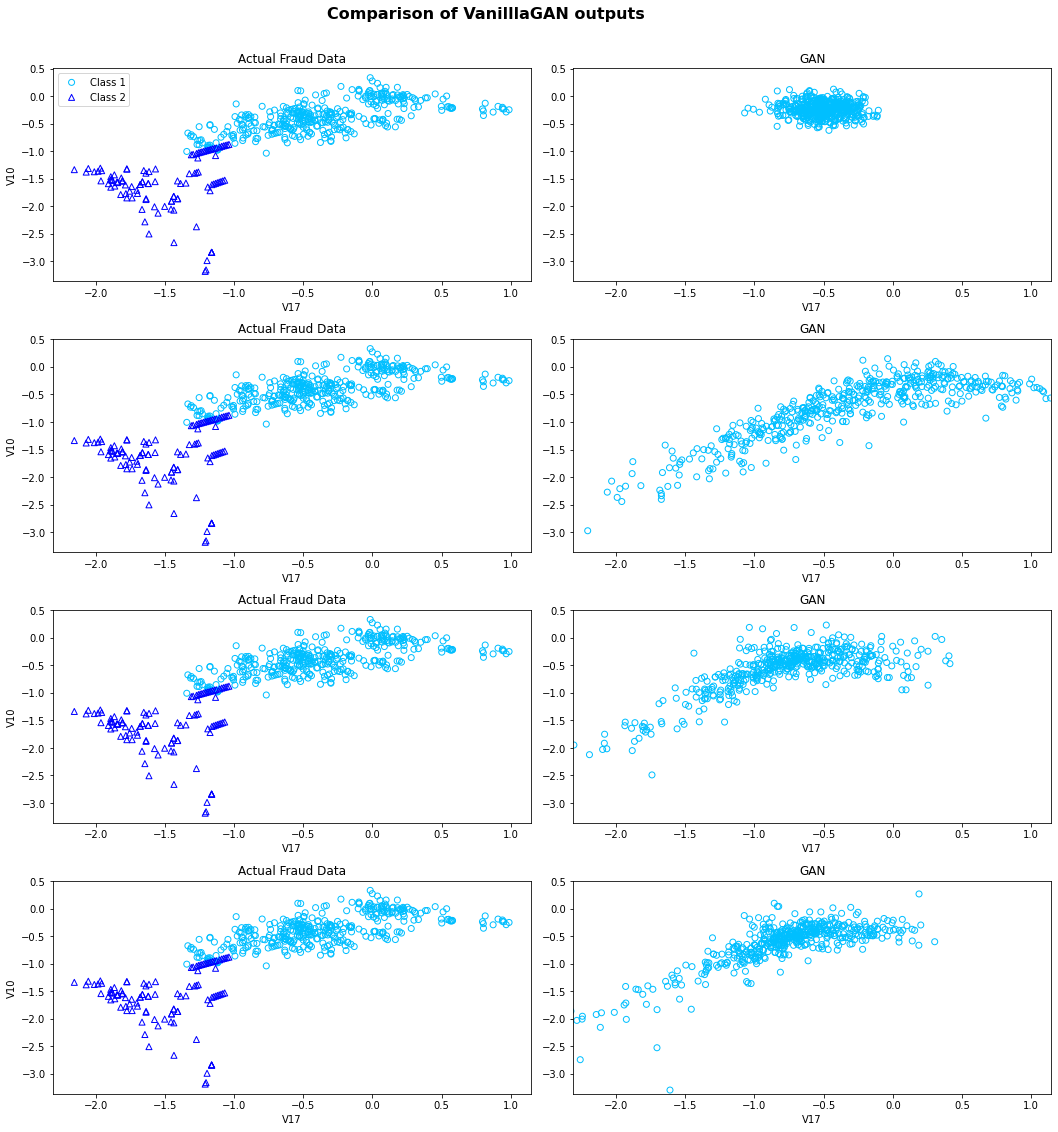

In [ ]:
plt.figure(figsize=(16, 16))
# Go through each of the 3 model_step values -> 0, 100, 200
for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    

    # Plot 'Class 1' and 'Class 2' samples taken from the original data, in a random shuffled fashion
    for group, color, marker, label in zip(real_samples.groupby('Class_1'), colors, markers, class_labels ):
        plt.scatter( group[1][[col1]], group[1][[col2]], 
                         label=label, marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Fraud Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    # Go through all the GAN models listed in 'model_names' and defined in 'models'
    for i, model_name in enumerate( model_names[:] ):

        [model_name, with_class, generator_model] = models[model_name]

        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

        #print(with_class)

        if with_class:
            g_z = generator_model.predict([z, labels])

            #print(g_z)

            gen_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
            for group, color, marker, label in zip( gen_samples.groupby('Class_1'), colors, markers, class_labels ):
                plt.scatter( group[1][[col1]], group[1][[col2]], 
                                 label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model.predict(z)
            gen_samples = pd.DataFrame(g_z, columns=data_cols+['label'])
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]],
                             label=class_labels[0], marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)   
        plt.xlabel(col1)
        ax.set_xlim(xlims), ax.set_ylim(ylims)
    

plt.suptitle('Comparison of '+str_model+' outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for training steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)


if not os.path.exists("./img"):
    os.makedirs("./img")
plt.savefig('img/Comparison_of_'+str_model+'_outputs.png', dpi=100)

gen_samples.describe
gen_samples.values[0]
gen_samples.to_csv('./Generated_'+str_model+'_sample.csv', sep = ';')
